<a href="https://colab.research.google.com/github/nazirumar/NLP/blob/main/consumer_complain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

**# Import The Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLP/consumer_complaints.csv',)
df.head()

<ipython-input-3-fc4954cc1ce9>:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/NLP/consumer_complaints.csv',)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


**Data Understanding Show the Data Columns**

In [4]:
for col in df.columns:
  print(col)

date_received
product
sub_product
issue
sub_issue
consumer_complaint_narrative
company_public_response
company
state
zipcode
tags
consumer_consent_provided
submitted_via
date_sent_to_company
company_response_to_consumer
timely_response
consumer_disputed?
complaint_id


In [5]:
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

**# Selecting required columns and rows**

In [6]:
df = df[['product', 'consumer_complaint_narrative']]
df = df[pd.notnull(df['consumer_complaint_narrative'])]
df.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


**# Factorizing the category column**

In [7]:
df['category_id'] = df['product'].factorize()[0]
df.head()

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


**# Check the distriution of complaints by category**

In [8]:
df.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

# Let plot it and see

TypeError: ignored

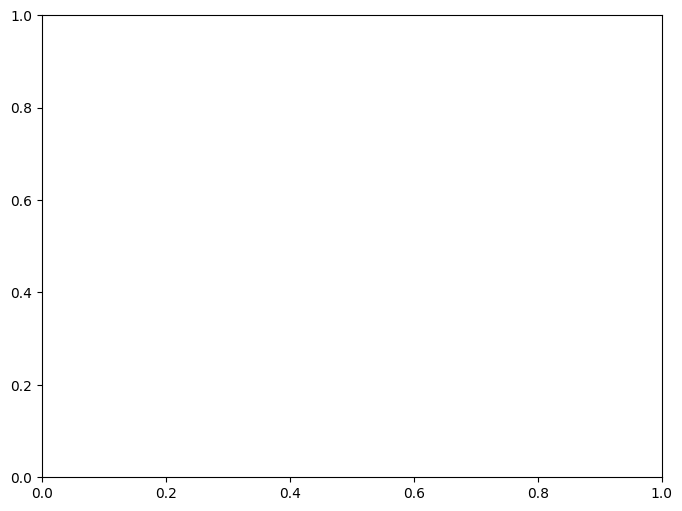

In [9]:
fig = plt.figure(figsize=(8,6))
x = df.groupby('product').consumer_complaint_narrative.count()
plt.plot(x=x, width=0.8)
plt.show()

**Splitting the data**

In [12]:
train_x, valid_x, train_y, valid_y = train_test_split(df['consumer_complaint_narrative'], df['product'])

 Feature engineering using TF-IDF

In [13]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word',
token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['consumer_complaint_narrative'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

Model building and evaluation

In [15]:
model = LogisticRegression().fit(xtrain_tfidf, train_y)
# Model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=150, multi_class='ovr',
n_jobs=1,
 penalty='l2', random_state=None, solver='liblinear',
tol=0.0001,
 verbose=0, warm_start=False)
# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),
valid_y)
print ("Accuracy: ", accuracy)

Accuracy:  0.8487606274697641


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print(metrics.classification_report(valid_y,model.predict(xvalid_tfidf), target_names=df['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.83      0.79      0.81      1406
          Consumer Loan       0.76      0.61      0.68       886
               Mortgage       0.80      0.84      0.82      2010
            Credit card       0.87      0.85      0.86      3126
       Credit reporting       0.82      0.90      0.86      4457
           Student loan       0.78      0.57      0.66       146
Bank account or service       0.92      0.95      0.93      3696
            Payday loan       0.00      0.00      0.00        28
        Money transfers       0.75      0.27      0.40       195
Other financial service       0.77      0.62      0.69       217
           Prepaid card       0.90      0.78      0.83       535

               accuracy                           0.85     16702
              macro avg       0.74      0.65      0.68     16702
           weighted avg       0.85      0.85      0.84     16702



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))

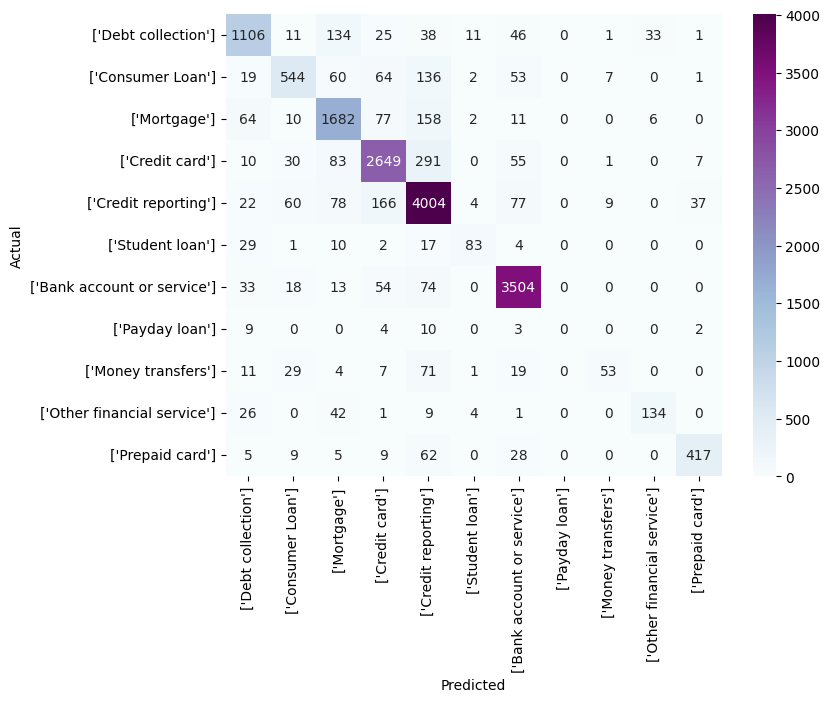

In [19]:
category_id_df = df[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id',
'product']].values)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu",
 xticklabels=category_id_df[['product']].values,
yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
# Prediction example
texts = ["This company refuses to provide me verification and validation of debt" + "per my right under the FDCPA. I do not believe this debt is mine."]
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
print(texts)
print(" - Predicted as: '{}'".format(id_to_category[predictions[0]]))

['This company refuses to provide me verification and validation of debtper my right under the FDCPA. I do not believe this debt is mine.']
 - Predicted as: 'Credit reporting'
